In [671]:
import pandas as pd
from soupsieve import select

import UserGraph
import importlib
importlib.reload(UserGraph)
import UserGraph

In [672]:
USERS_PATH = '../resources/userbase/users.csv'
EDGES_PATH = '../resources/userbase/teacher_student_connections.csv'

In [673]:
users = pd.read_csv(USERS_PATH)
ts_connection = pd.read_csv(EDGES_PATH)

In [674]:
ug = UserGraph.UserGraph()
ug.build_from_dataframe(users, ts_connection)

In [675]:
ug.add_user('FX5pjNkaiobajpRTuNBfTkx4JWx1', attributes = {'is_professor': True,
 'is_student': True,
 'first_name': 'Aca',
 'last_name': 'acA',
 'rating_avg_teacher': 4.8,
 'email': 'filip.simona16@gmail.com',
 'teaching_subject': 'Biology',
 'learning_subject': 'Mathematics',
                         'avatar_id' : 1}
            )
ug.add_user(1002, attributes = {'is_professor': True,
 'is_student': True,
 'first_name': 'acA',
 'last_name': 'AcA',
 'rating_avg_teacher': 4.8,
 'email': 'filip.simona16@gmail.com',
 'teaching_subject': 'Religion',
 'learning_subject': 'Biology',
  'avatar_id' : 2}
            )
ug.add_user(1001, attributes = {'is_professor': True,
 'is_student': True,
 'first_name': 'acA',
 'last_name': 'AcA',
 'rating_avg_teacher': 4.8,
 'email': 'filip.simona16@gmail.com',
 'teaching_subject': 'Mathematics',
 'learning_subject': 'Religion',
  'avatar_id' : 2}
            )

In [676]:
ug.save_to_file('../resources/userbase/userbase_graph.pkl')

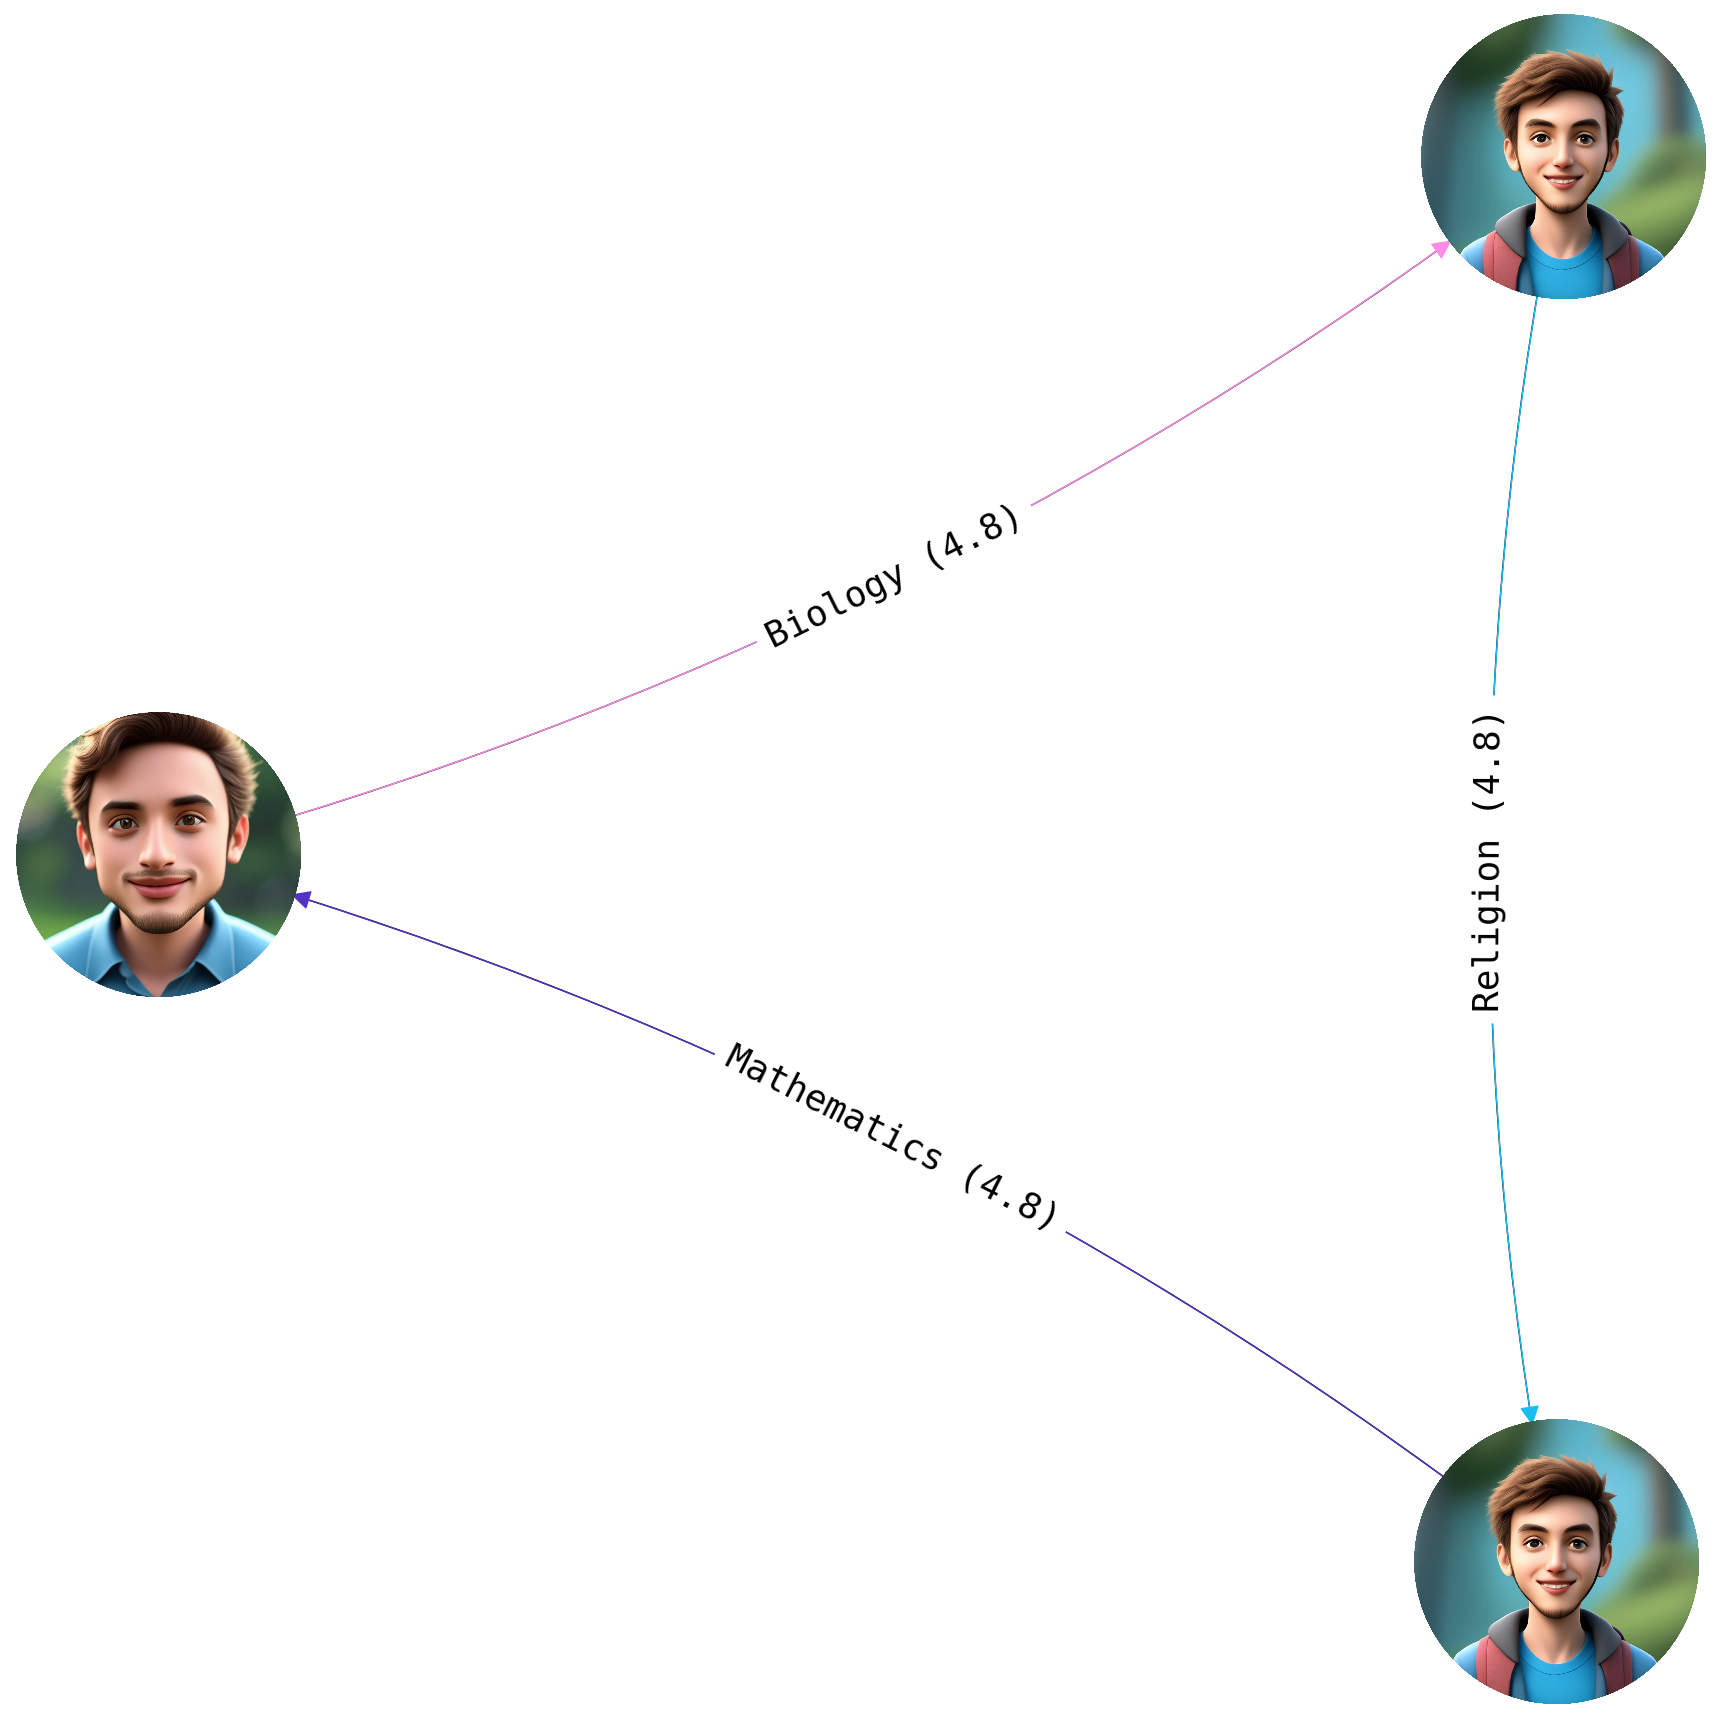

In [678]:
ug.draw_cycle("FX5pjNkaiobajpRTuNBfTkx4JWx1");

In [578]:
ug.change_cycle_status([1001, 1002], success=True)

In [580]:
ug.pending_cycles

[[1001, 1002]]

In [581]:
ug.find_best_cycle('6cQc9j6kv9Ulr5thPpcT8ggdyMy2')

In [568]:
saved = (UserGraph.UserGraph.load_from_file("../resources/userbase/userbase_graph.pkl"))

NodeView(('vmmqDSk5c6Vzm1GVBaeTjWows462', 'RLzURKe1txVTz3xNWETTI6Y6I4s2', '4Kqp1DSRC3bDOJpDtLtSNzG4JY23', 'gPOuTjgnMFhtRvQKYeO9uzCGFGF2', 'HvKFFTWt49cw1zHsKHHQk7oB7C73', 'lC5lV6y00IMcULqd37ulsUR9UH53', 'z9gMPalu90Q4jPiPtkjfVFe6uCg1', '9bqS3iWW13O5aaiZXVZwdlFjkRf2', 'YtgfSkPACIMKsHqtQgi8QfGFG4v2', '3vn4cUC4QHeXA1gACFp8xODOHFs1', 'Y6Npkx5BbiOFudQRBv2xLU9zK7Z2', 'cATOgO2mlyXyaRz3EEfN0ZYOcSC2', 'KVC4lHfnvoY8PnChCo14HO4UGCq2', 'yd2BVoD8ZCTHWrtqo5n07bPMiMh1', '9ArjTmCr4FUQyghuNZiLdU7FJf32', 'DuDz5eQC64eHXn9h7VJfdEVi1zL2', 'do66yzZ3yiPzyPP1yES4cRZH92a2', '5UWaG2MRdkMy9QDz0jQ83jB70ho1', 'NL2gPg6K4xeLojBxfpS5zQcBjMn2', 'PBHxe9Y6WqN87X9rUjoBHjCtw1H3', 'SDW4eKJLUbZJwQxRluUGI2d8msF2', 'xgOlaWKeAAPOwBcV3unvIS3mYFw2', 'nq2F09RAv5OyBVX0buZNLIPB59w1', 'IG1gCsSQZvbFeokf7LptrKiNOMC3', 'ePO4zSteBwNBTFuffcTlh4UjQTD3', 'tE5PvOu6jDh3GxCnZeHTIW0Aqwf2', 'c1S7JcChzrWEITXvu7MAxlapg6k2', 'saPKknCXcpTkxwWiMXMtWJnRG8i2', 'b1CB3wBqTMXZxnE9eTiQlwQs4rt2', 'AzjRDVmg0rb180ATpYPhXrD1o593', 'OU296Pl0AqaL9yiaGtnKwmuT8543'

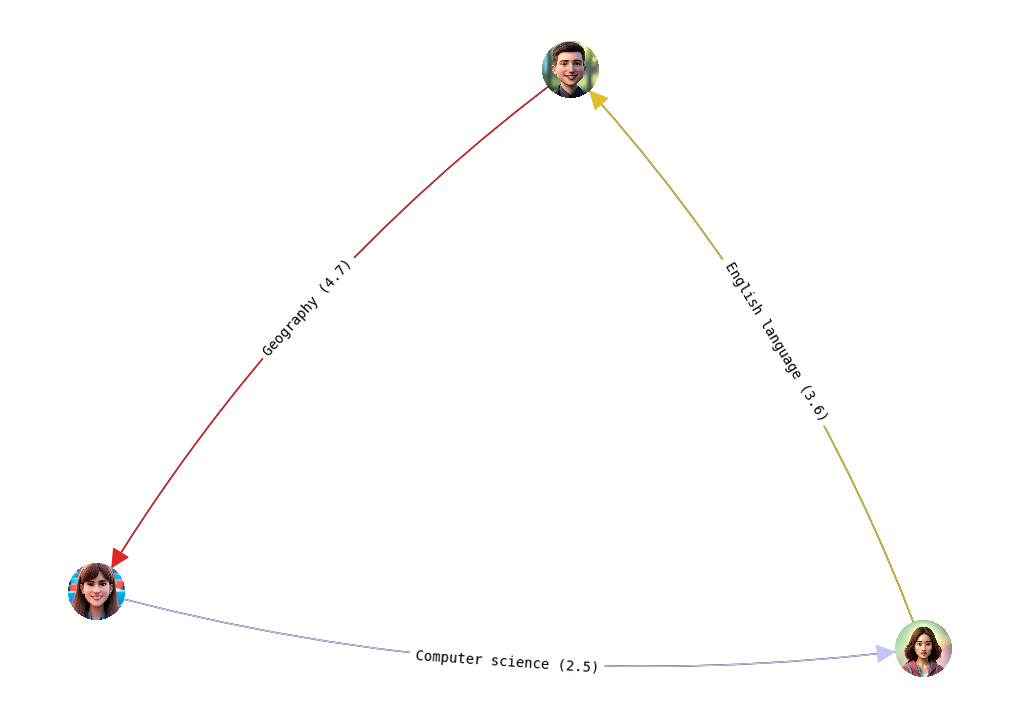

In [569]:
slika = ug.draw_cycle("ON1FcTL1iFZRX8XWHR29NphsMo42", connection_style='arc3,rad=0.1')

In [582]:
for user in users.user_id.iloc[:100]:
    print(user, ug.find_best_cycle(user))

vmmqDSk5c6Vzm1GVBaeTjWows462 ['9bqS3iWW13O5aaiZXVZwdlFjkRf2', 'vmmqDSk5c6Vzm1GVBaeTjWows462']
b1CB3wBqTMXZxnE9eTiQlwQs4rt2 None
RPfLdWgxePQrl3hmLp1wF4th67K2 None
RLzURKe1txVTz3xNWETTI6Y6I4s2 ['gAiFKRlxH0awiaeJSa0RVbvEeuE3', 1002, 'RLzURKe1txVTz3xNWETTI6Y6I4s2']
ZzCuLd5veaUPzJcm8b54uRSga862 None
3pVWIuTpv2MqJYvC02IsHkZyU8H3 None
8iKwNP1WsnQrmsmMwqR9JbLEHAW2 None
2sSeEN88QzUvygWoeT2QKeY79WE3 None
hmzF4gQWPNOif2TsZKRzcijjMsV2 None
nLorrj6dDobQdIGHFXT6xuaj4Ng2 None
ejCKAkZAGaW0FMBUwZFm9Mfjle83 None
ttmMN6uaJOXHONdOeyMi8bY28iW2 None
lNOIkWqo5zYcfULD1xZu246l7G52 None
AzjRDVmg0rb180ATpYPhXrD1o593 ['9bqS3iWW13O5aaiZXVZwdlFjkRf2', 'AzjRDVmg0rb180ATpYPhXrD1o593']
GU9odA29eWN98fZo5mbFn6ixWca2 None
58cctSgMfSR6v1bLaR0x8bjAcQ63 ['58cctSgMfSR6v1bLaR0x8bjAcQ63', 1002, '9ArjTmCr4FUQyghuNZiLdU7FJf32']
3slPTEIgK6MUJHBfjzwhSjsYHke2 None
GpGhEis7YwTMhfAYevo9eeEdAQQ2 None
tzwOrmJ8wjMIsOay0afLhfZlzfy1 None
6OLSfs1bZARPhEaW35xutDq81iE2 ['6OLSfs1bZARPhEaW35xutDq81iE2', 'AzjRDVmg0rb180ATpYPhXrD1o593', 'RLzURKe